<center><font size="6"><b>Комп'ютерний практикум 8.

<center><b> Методи класифікації </font>


<center><b><i><font size="4"> LR (Logistic Regression)

SVM(Support Vector Machine)</b></center>


### Завдання №1

* Завантажте дані з лінку

`url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"`

<center><img src="http://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png" width="600" alt="content-vs-colab.png"></center>

* задайте наступні імена колонок датафрейму:

`names=['sepal length','sepal width','petal length','petal width','class label']`
* виведіть описову статистику датасету
* побудуйте парні діаграми класів для всих ознак датасету
* сформуйте масив характеристик $X$ та цільової змінної/класу $Y$ 
* виведіть кількість елементів у кожному класі
* поділіть вибірку на навчальну та тестову у співвідношенні 30/70
 


       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class label, dtype: int64


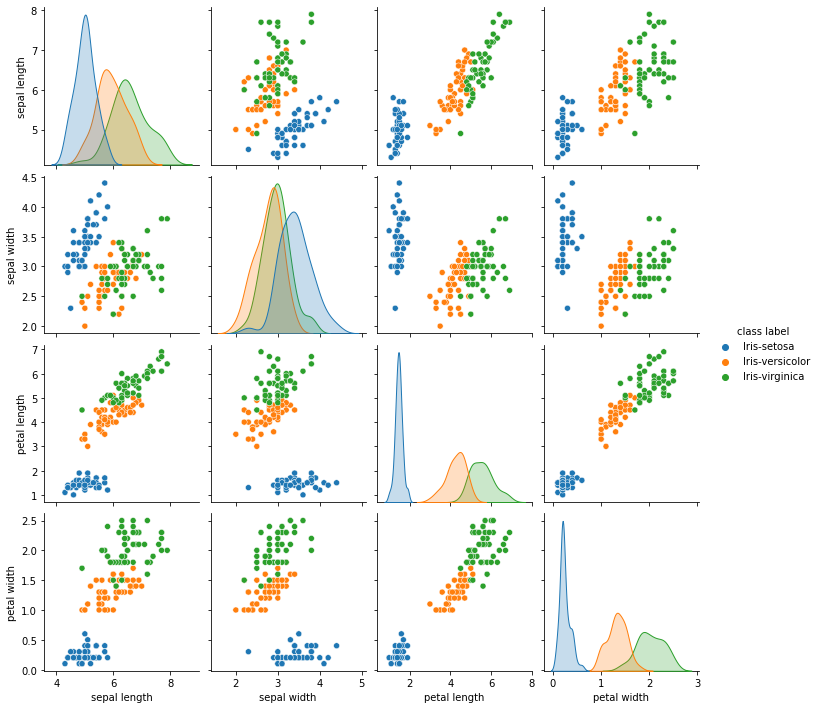

In [1]:
# МІСЦЕ ДЛЯ КОДУ

# імпортуємо необхідні бібліотеки
import pandas as pd
from sklearn.model_selection import train_test_split

# завантажуємо дані
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal length','sepal width','petal length','petal width','class label']
data = pd.read_csv(url, names=names)

# виводимо описову статистику
print(data.describe())

# побудова парних діаграм класів
import seaborn as sns
sns.pairplot(data, hue="class label")

# формуємо масив характеристик X та цільової змінної/класу Y
X = data.drop('class label', axis=1)
Y = data['class label']

# виводимо кількість елементів у кожному класі
print(Y.value_counts())

# поділіть вибірку на навчальну та тестову у співвідношенні 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Завдання №2

* Проведіть стандартизацію даних
* застосуйте алгоритм LR, використовуючи `solver='liblinear'`,`solver='newton-cg'` та `solver='lbfgs'`
* порівняйте результати роботи різних оптимізаторів оціночними критиеріями 
* побудуйте багатокласову матрицю невідповідностей, та інтерпретуйте її результати
* зробіть висновки


In [2]:
# МІСЦЕ ДЛЯ КОДУ
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# стандартизуємо дані
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# створюємо моделі логістичної регресії з різними оптимізаторами
models = [('liblinear', LogisticRegression(solver='liblinear', multi_class='auto', random_state=42)),
          ('newton-cg', LogisticRegression(solver='newton-cg', multi_class='auto', random_state=42)),
          ('lbfgs', LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42))]

# навчаємо моделі та робимо передбачення
for name, model in models:
    model.fit(X_train_std, Y_train)
    Y_pred = model.predict(X_test_std)
    print(f"Optimizer: {name}")
    print(f"Accuracy score: {accuracy_score(Y_test, Y_pred)}")
    print(classification_report(Y_test, Y_pred))

# побудова багатокласової матриці невідповідностей
conf_mat = confusion_matrix(Y_test, Y_pred)
print(f"Confusion matrix:\n{conf_mat}")


Optimizer: liblinear
Accuracy score: 0.9111111111111111
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.69      0.82        13
 Iris-virginica       0.76      1.00      0.87        13

       accuracy                           0.91        45
      macro avg       0.92      0.90      0.89        45
   weighted avg       0.93      0.91      0.91        45

Optimizer: newton-cg
Accuracy score: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Optimizer: lbfgs
Accuracy score: 1.0
                 precision    recall  f1-score   support

    

Бачимо, що `solver='liblinear'` не збігся до глобального максимума, якого вдалось досягти з використанням двох інших оптимізаторів

### Завдання №3

* Застосуйте алгоритм SVM з ядром `rbf`, `linear` та `sigmoid` 
* порівняйте результати роботи різних перетворень функцій ядер оціночними критеріями 
* побудуйте багатокласову матрицю невідповідностей, та інтерпретуйте її результати
* зробіть висновки

In [3]:
# МІСЦЕ ДЛЯ КОДУ
from sklearn.svm import SVC

kernels = ['rbf', 'linear', 'sigmoid']
for kernel in kernels:
    print(f"Kernel: {kernel}")
    svm = SVC(kernel=kernel)
    svm.fit(X_train_std, Y_train)
    y_pred = svm.predict(X_test_std)
    print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")
    print(classification_report(Y_test, y_pred))
    print(confusion_matrix(Y_test, y_pred))


Kernel: rbf
Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Kernel: linear
Accuracy: 0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Kernel: sigmoid
Accuracy: 0.8888888888888888
       

Найкраще себе показало ядро радіально-базисних функції, за допомогою нього вдалось досягти глобального оптимуму. Лінійне ядро показало дещо гірший результат, проте краще ніж логістична регресія з оптимізатором liblinear. Сигмоїдне ядро було найгіршим з розглянутих моделей.

### Завдання №4

* Порівняйте результати класифікації методами, отриманими в попередньому КП№7, kNN, дерева рішень та LR, SVM для заданого набору даних
* оберіть найкращий метод класифікації, обгрунтуйте ваше рішення



Як і в цьому, так і в попередньому КП вдалось досягти глобального оптимуму та 100% точності з використанням кожного з алгоритмів, що є цілком очікуваним для такого невеликого та нескладного датасету. Вибір найкращого алгоритму класифікації залежить від багатьох факторів, таких як розмір вибірки, тип даних, кількість класів та характеристики ознак. Для досягнення кращих результатів необхідно провести дослідження різних алгоритмів та їхніх параметрів, а також врахувати специфіку задачі класифікації.